In [18]:
# =====================================================
# Projeto: Customer Churn Prediction in Telecom
# Objetivo: Explorar dados e entender padrões relacionados ao churn - EDA (exploration data analyses)
# =====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configurações globais
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

TELCO Customer Churn - IBM Sample data set
Leitura da base de dados + Visão geral do dataset

In [19]:
df = pd.read_csv('../data/raw/Telco-Customer-Churn.csv', na_values=["", " ", "NaN"])

print("Dimensões do dataset:", df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all'))

Dimensões do dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


Verifica valores ausentes

In [ ]:
missing = df.isnull().sum()
missing_percent = (missing / df.shape[0]) * 100
missing_df = pd.DataFrame({
    'Valores ausentes': missing,
    '% do Total': missing_percent
}).sort_values(by='Valores ausentes', ascending=False)

print("Valores ausentes (incluindo NaN):")
display(missing_df[missing_df['Valores ausentes'] > 0])

# check do tipo de dado da coluna 'TotalCharges'
print(df['TotalCharges'].dtype)
print(df['TotalCharges'].unique()[:10])

Distribuição variável alvo - churn

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Churn', palette='pastel')
plt.title('Distribuição de Churn')
plt.show()

Análise de variáveis categóricas - gender, partner, dependets and another services (phoneservice, lines etc)

In [ ]:
cat_vars = df.select_dtypes(include='object').columns.drop('customerID')

for col in cat_vars:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} x Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Análise de variáveis numéricas

tenure = Number of months the customer has stayed with the company


In [ ]:
num_vars = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_vars:
    plt.figure(figsize=(6,3))
    sns.histplot(data=df, x=col, hue='Churn', kde=True)
    plt.title(f'Distribuição de {col} por Churn')
    plt.tight_layout()
    plt.show()

Matriz de correlação - variáveis numericas

In [ ]:
plt.figure(figsize=(10,8))
corr = df[num_vars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre variáveis numéricas')
plt.show()

Matriz de correlação - Churn x variaveis categoricas

In [20]:
binary_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'gender', 'Partner',
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Dependents',
               'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

#transformar variaveis binarias/categorias em numericas
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

#transformas variáveis categóricas com múltiplas categorias
multi_cat_cols = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

#remove coluna ID
df = df.drop(columns=['customerID'])

display(df.info())
display(df.describe(include='all'))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 0 non-null      float64
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          6361 non-null   float64
 7   OnlineSecurity                         5517 non-null   float64
 8   OnlineBackup                           5517 non-null   float64
 9   DeviceProtection                       5517 non-null   float64
 10  TechSupport                            5517 non-null   float64
 11  Stre

None

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,0.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043,7043,7043,7043,7043,7043,7043
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3947,5517,5570,5348,5521,4678,5431
mean,NaN,0.162147,0.483033,0.299588,32.371149,0.903166,0.467065,0.365960,0.440276,0.439007,0.370491,0.490665,0.495197,0.592219,64.761692,2283.300441,0.265370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.368612,0.499748,0.458110,24.559481,0.295752,0.498953,0.481742,0.496465,0.496311,0.482980,0.499958,0.500022,0.491457,30.090047,2266.771362,0.441561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Correlação das variáveis com Churn:


Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
MultipleLines                            0.040207
PhoneService                             0.011942
StreamingTV                             -0.037057
StreamingMovies                         -0.040132
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
DeviceProtection                        -0.177125
Contract_One year                       -0.177820
OnlineBackup                            -0.196061
TotalCharges                            -0.199484
InternetService_No                      -0.227890
TechSupport                             -0.274422


C:\Users\anapv\AppData\Local\Temp\ipykernel_15940\1043747239.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_churn.values, y=corr_with_churn.index, palette='coolwarm')


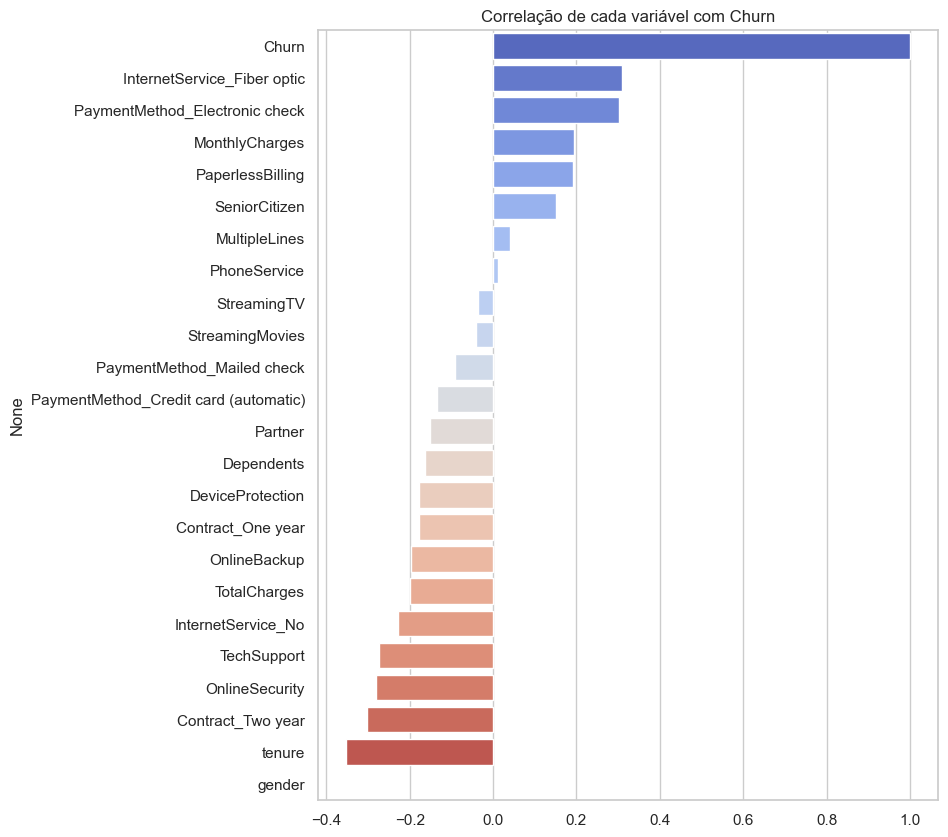

In [21]:
#filtra apenas colunas numéricas
numeric_df = df.select_dtypes(include=[np.number])

#garante que colunas numéricas estão corretas
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#Calcular correlação com Churn
corr_with_churn = df.corr()['Churn'].sort_values(ascending=False)

print("Correlação das variáveis com Churn:")
display(corr_with_churn)

#plot grafico de correlação
plt.figure(figsize=(8,10))
sns.barplot(x=corr_with_churn.values, y=corr_with_churn.index, palette='coolwarm')
plt.title('Correlação de cada variável com Churn')
plt.show()

salva os dados processados em .csv p/ ser utilizar na modelagem

In [22]:
df_processed = pd.get_dummies(df, drop_first=True)
def save_processed_data(dataframe, path="../data/processed/telco_churn_processed.csv"):
    dataframe.to_csv(path, index=False)
    print(f"Arquivo processado salvo em: {path}")

# Salvar dados processados
save_processed_data(df_processed)

Arquivo processado salvo em: ../data/processed/telco_churn_processed.csv


Insights iniciais:
1. As principais variáveis correlacionadas (fibra óptica, método de pagamento, preço) são relacionadas à oferta e modelo de cobrança, o que significa que ajustes nesses pontos podem ter impacto direto na retenção dos clientes.
2. Clientes com serviço do tipo fibra óptica têm maior probabilidade de churn, correlação positiva alta com o churn, indicando que há problemas na experiência do cliente - vale investigar mais a fundo o principal motivo.
3. Clientes que pagam via cheque eletrônico tendem a cancelar mais, pode estar relacionado a menor fidelização automática, quando comparado ao débito automático e cartão.
4. Clientes com planos mais caros estão associados ao churn ligeiramente maior, assim como os clientes que optam por fatura digital.
5. Clientes antigos tendem a permanecer com o serviço, pois possuem a maior correlação negativa com churn (variável tenure).
6. Clientes com multiplas linhas ou serviço de telefonia fixa não influênciam fortemente no churn - variáveis neutras.
